<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_11/Module_11_2_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recap: RNN

https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks

# Vanishing Gradient Problem

![vanishing](https://www.kdnuggets.com/wp-content/uploads/vanishing-gradient-problem-12.png)
Source: https://www.kdnuggets.com/2022/02/vanishing-gradient-problem.html

https://medium.com/@El_Fares_Anass/a-basic-explanation-how-the-gradient-descent-is-determined-during-back-propagation-864376f8f1a4

https://kharshit.github.io/blog/2019/01/04/the-gradient-problem-in-rnn

![Back-prop in NN](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*oLWpRn3a2IW_YYg9hozS4Q.png)

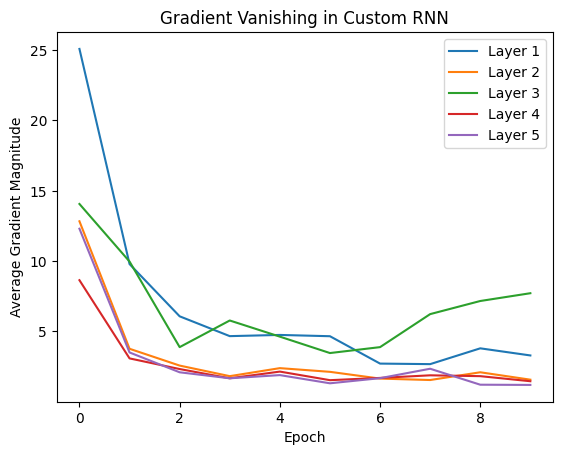

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate some toy data
X = np.random.randn(1000, 10, 1)  # 1000 sequences of length 10, each with 1 feature
y = np.random.randint(0, 2, size=(1000, 1))  # Binary classification labels, reshaped

# Define a custom RNN model
class CustomRNNModel(tf.keras.Model):
    def __init__(self, units, depth):
        super(CustomRNNModel, self).__init__()
        self.depth = depth
        self.rnn_layers = [tf.keras.layers.SimpleRNN(units, return_sequences=True) for _ in range(depth)]
        self.dense = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        states = inputs
        for i in range(self.depth):
            states = self.rnn_layers[i](states)
        outputs = self.dense(states[:, -1, :])  # Take only the last output of the last layer
        return outputs

# Create the custom RNN model
units = 10
depth = 5
model_rnn = CustomRNNModel(units=units, depth=depth)

# Compile the model
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define a function to compute gradients - average gradient magnitude
def get_gradients(inputs, model):
    with tf.GradientTape(persistent=True) as tape:
        predictions = model(inputs)
        loss = tf.keras.losses.binary_crossentropy(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    del tape
    return gradients

# Train the model and track gradients
num_epochs = 10
gradients_history = [[] for _ in range(depth)]
for epoch in range(num_epochs):
    gradients = get_gradients(X, model_rnn)
    for i in range(depth):
        if gradients[i] is not None:
            gradients_history[i].append(np.mean([np.mean(np.abs(grad)) for grad in gradients[i]]))
    model_rnn.fit(X, y, batch_size=32, epochs=1, verbose=0)

# Plot the gradients
for i in range(depth):
    plt.plot(gradients_history[i], label=f"Layer {i+1}")
plt.xlabel('Epoch')
plt.ylabel('Average Gradient Magnitude')
plt.title('Gradient Vanishing in Custom RNN')
plt.legend()
plt.show()


## GRU

![gru](https://miro.medium.com/v2/resize:fit:846/format:webp/1*i-yqUwAYTo2Mz-P1Ql6MbA.png)

https://medium.com/@anishnama20/understanding-gated-recurrent-unit-gru-in-deep-learning-2e54923f3e2

https://d2l.ai/chapter_recurrent-modern/gru.html

https://github.com/kaustubhhiware/LSTM-GRU-from-scratch/blob/master/module.py

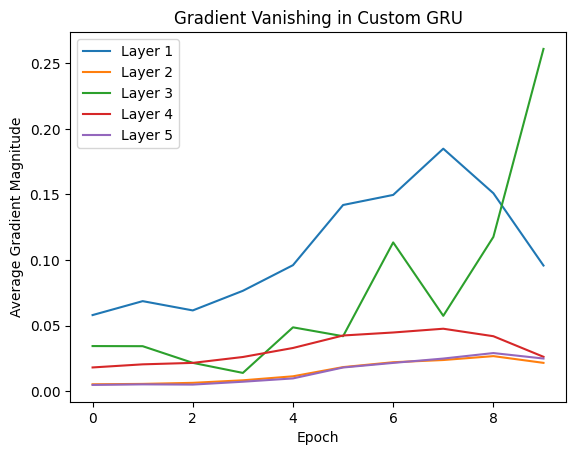

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# Define a custom GRU model
class CustomGRUModel(tf.keras.Model):
    def __init__(self, units, depth):
        super(CustomGRUModel, self).__init__()
        self.depth = depth
        self.gru_layers = [tf.keras.layers.GRU(units, return_sequences=True) for _ in range(depth)]
        self.dense = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        states = inputs
        for i in range(self.depth):
            states = self.gru_layers[i](states)
        outputs = self.dense(states[:, -1, :])  # Take only the last output of the last layer
        return outputs

# Create the custom GRU model
units = 10
depth = 5
model_gru = CustomGRUModel(units=units, depth=depth)

# Compile the model
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define a function to compute gradients - average gradient magnitude
def get_gradients(inputs, model):
    with tf.GradientTape(persistent=True) as tape:
        predictions = model(inputs)
        loss = tf.keras.losses.binary_crossentropy(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    del tape
    return gradients

# Train the model and track gradients
num_epochs = 10
gradients_history = [[] for _ in range(depth)]
for epoch in range(num_epochs):
    gradients = get_gradients(X, model_gru)
    for i in range(depth):
        if gradients[i] is not None:
            gradients_history[i].append(np.mean([np.mean(np.abs(grad)) for grad in gradients[i]]))
    model_gru.fit(X, y, batch_size=32, epochs=1, verbose=0)

# Plot the gradients
for i in range(depth):
    plt.plot(gradients_history[i], label=f"Layer {i+1}")
plt.xlabel('Epoch')
plt.ylabel('Average Gradient Magnitude')
plt.title('Gradient Vanishing in Custom GRU')
plt.legend()
plt.show()


## LSTM

![lstm](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*J5W8FrASMi93Z81NlAui4w.png)

https://d2l.ai/chapter_recurrent-modern/lstm.html

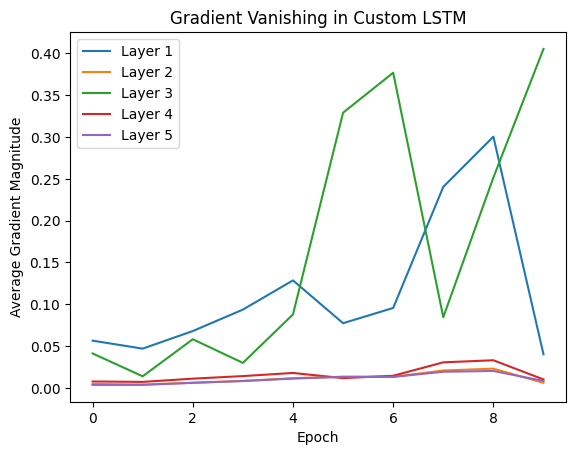

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# Define a custom LSTM model
class CustomLSTMModel(tf.keras.Model):
    def __init__(self, units, depth):
        super(CustomLSTMModel, self).__init__()
        self.depth = depth
        self.lstm_layers = [tf.keras.layers.LSTM(units, return_sequences=True) for _ in range(depth)]
        self.dense = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        states = inputs
        for i in range(self.depth):
            states = self.lstm_layers[i](states)
        outputs = self.dense(states[:, -1, :])  # Take only the last output of the last layer
        return outputs

# Create the custom LSTM model
units = 10
depth = 5
model_lstm = CustomLSTMModel(units=units, depth=depth)

# Compile the model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define a function to compute gradients - average gradient magnitude
def get_gradients(inputs, model):
    with tf.GradientTape(persistent=True) as tape:
        predictions = model(inputs)
        loss = tf.keras.losses.binary_crossentropy(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    del tape
    return gradients

# Train the model and track gradients
num_epochs = 10
gradients_history = [[] for _ in range(depth)]
for epoch in range(num_epochs):
    gradients = get_gradients(X, model_lstm)
    for i in range(depth):
        if gradients[i] is not None:
            gradients_history[i].append(np.mean([np.mean(np.abs(grad)) for grad in gradients[i]]))
    model_lstm.fit(X, y, batch_size=32, epochs=1, verbose=0)

# Plot the gradients
for i in range(depth):
    plt.plot(gradients_history[i], label=f"Layer {i+1}")
plt.xlabel('Epoch')
plt.ylabel('Average Gradient Magnitude')
plt.title('Gradient Vanishing in Custom LSTM')
plt.legend()
plt.show()


## Comparison

In [7]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import Adam

# Generate some toy data
X = np.random.randn(1000, 1000, 100)  # 1000 sequences of length 1000, each with 100 features
y = np.random.randint(0, 2, size=(1000,))  # Binary classification labels

# Define a simple RNN model
model = Sequential()
model.add(SimpleRNN(10, input_shape=(1000, 100), return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Train the model
history_rnn = model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - accuracy: 0.4859 - loss: 0.8041
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.6608 - loss: 0.6377
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.7164 - loss: 0.5833
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - accuracy: 0.7483 - loss: 0.5565
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.7774 - loss: 0.5023
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step - accuracy: 0.8302 - loss: 0.4391
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.8620 - loss: 0.3967
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.8492 - loss: 0.3743
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.8820 - loss: 0.3244
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.8984 - loss: 0.2973


In [9]:
from keras.layers import LSTM

# Define an LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(10, input_shape=(1000, 100), return_sequences=False))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the LSTM model
model_lstm.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Train the LSTM model
history_lstm = model_lstm.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 254ms/step - accuracy: 0.4985 - loss: 0.7095
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 302ms/step - accuracy: 0.7240 - loss: 0.6190
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 294ms/step - accuracy: 0.8280 - loss: 0.5011
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 296ms/step - accuracy: 0.9438 - loss: 0.3186
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.9809 - loss: 0.1937
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 280ms/step - accuracy: 0.9954 - loss: 0.0905
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 293ms/step - accuracy: 0.9967 - loss: 0.0589
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 295ms/step - accuracy: 0.9961 - loss: 0.0475
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 269ms/step - accuracy: 1.0000 - loss: 0.0311
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 255ms/step - accuracy: 0.9996 - loss: 0.0184


/tmp/ipython-input-10-1943434190.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc_lstm, 'b', label='Точність на тренуванні - LSTM', c="red")  # Графік точності на тренувальних данних
/tmp/ipython-input-10-1943434190.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss_lstm, 'b', label='Втрати на валідації - LSTM', c="red")  # Графік втрат на валідаційних данних


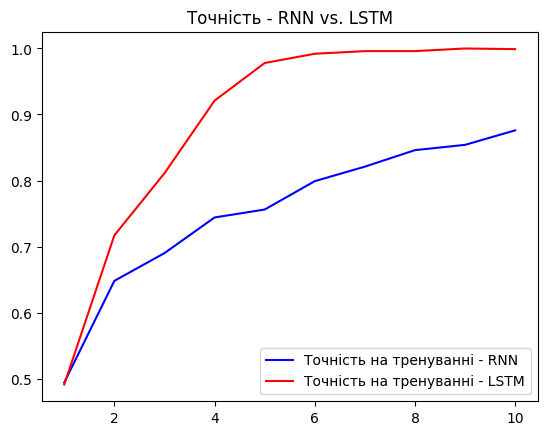

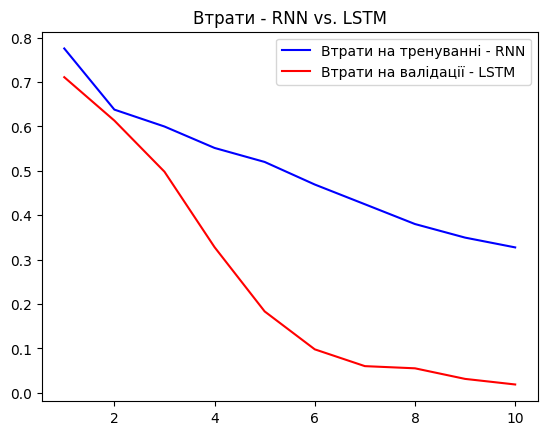

In [10]:
acc_rnn = history_rnn.history['accuracy']
loss_rnn = history_rnn.history['loss']

acc_lstm = history_lstm.history['accuracy']
loss_lstm = history_lstm.history['loss']


epochs = range(1, len(acc_rnn) + 1)

plt.plot(epochs, acc_rnn, 'b', label='Точність на тренуванні - RNN')  # Графік точності на тренувальних данних
plt.plot(epochs, acc_lstm, 'b', label='Точність на тренуванні - LSTM', c="red")  # Графік точності на тренувальних данних
plt.title('Точність - RNN vs. LSTM')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss_rnn, 'b', label='Втрати на тренуванні - RNN')  # Графік втрат на тренувальних данних
plt.plot(epochs, loss_lstm, 'b', label='Втрати на валідації - LSTM', c="red")  # Графік втрат на валідаційних данних
plt.title('Втрати - RNN vs. LSTM')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

# Usage

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


196/196 - 119s - 606ms/step - accuracy: 0.7637 - loss: 0.4930 - val_accuracy: 0.8324 - val_loss: 0.3800
Epoch 2/5
196/196 - 133s - 681ms/step - accuracy: 0.8618 - loss: 0.3363 - val_accuracy: 0.8514 - val_loss: 0.3712
Epoch 3/5
196/196 - 122s - 621ms/step - accuracy: 0.8678 - loss: 0.3248 - val_accuracy: 0.8350 - val_loss: 0.4033
Epoch 4/5
196/196 - 141s - 720ms/step - accuracy: 0.8964 - loss: 0.2635 - val_accuracy: 0.8563 - val_loss: 0.3493
Epoch 5/5
196/196 - 166s - 848ms/step - accuracy: 0.9150 - loss: 0.2237 - val_accuracy: 0.8589 - val_loss: 0.3844
Test Loss: 0.3843751847743988, Test Accuracy: 0.8588799834251404


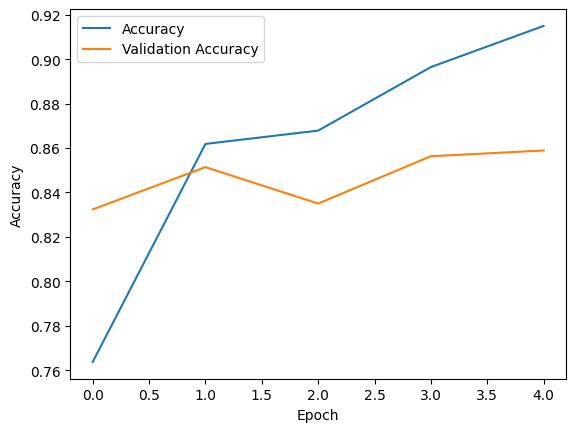

In [11]:
# from here: https://colab.research.google.com/drive/1R5VfJLZU0ZvYBRPAWBvLe6GSB3DReI55#scrollTo=W9LoZJdNpWLK

import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDb dataset
num_words = 10000  # Consider only the top 10,000 words
maxlen = 200  # Limit the maximum review length to 200 words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to ensure uniform length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Define the LSTM model
embedding_dim = 128
lstm_units = 64
model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    SpatialDropout1D(0.2),  # Dropout layer for regularization
    LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2),  # LSTM layer
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 5
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/5
196/196 - 39s - 201ms/step - accuracy: 0.6437 - loss: 0.6093 - val_accuracy: 0.7871 - val_loss: 0.4780
Epoch 2/5
196/196 - 41s - 207ms/step - accuracy: 0.8371 - loss: 0.3772 - val_accuracy: 0.8332 - val_loss: 0.4026
Epoch 3/5
196/196 - 38s - 193ms/step - accuracy: 0.8980 - loss: 0.2486 - val_accuracy: 0.8302 - val_loss: 0.4296
Epoch 4/5
196/196 - 36s - 185ms/step - accuracy: 0.9610 - loss: 0.1134 - val_accuracy: 0.8211 - val_loss: 0.5149
Epoch 5/5
196/196 - 41s - 208ms/step - accuracy: 0.9846 - loss: 0.0491 - val_accuracy: 0.8010 - val_loss: 0.6395
Test Loss: 0.6395477056503296, Test Accuracy: 0.80103999376297


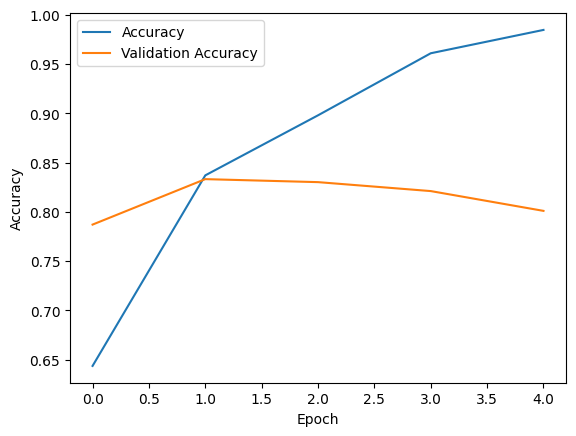

In [12]:
# RNN

model_rnn = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    SpatialDropout1D(0.2),  # Dropout layer for regularization
    SimpleRNN(64),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_rnn = model_rnn.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss_rnn}, Test Accuracy: {accuracy_rnn}")

# Plot training history
plt.plot(history_rnn.history['accuracy'], label='Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Bidirectional RNN

https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks @Variants of RNN

https://keras.io/api/layers/recurrent_layers/bidirectional/

Epoch 1/5
196/196 - 71s - 363ms/step - accuracy: 0.6488 - loss: 0.6108 - val_accuracy: 0.7710 - val_loss: 0.4899
Epoch 2/5
196/196 - 72s - 367ms/step - accuracy: 0.8059 - loss: 0.4199 - val_accuracy: 0.6851 - val_loss: 0.5859
Epoch 3/5
196/196 - 67s - 343ms/step - accuracy: 0.8913 - loss: 0.2782 - val_accuracy: 0.8366 - val_loss: 0.4063
Epoch 4/5
196/196 - 82s - 417ms/step - accuracy: 0.9578 - loss: 0.1213 - val_accuracy: 0.8125 - val_loss: 0.5054
Epoch 5/5
196/196 - 84s - 426ms/step - accuracy: 0.9877 - loss: 0.0439 - val_accuracy: 0.8098 - val_loss: 0.6061
Test Loss: 0.6061270833015442, Test Accuracy: 0.8097599744796753


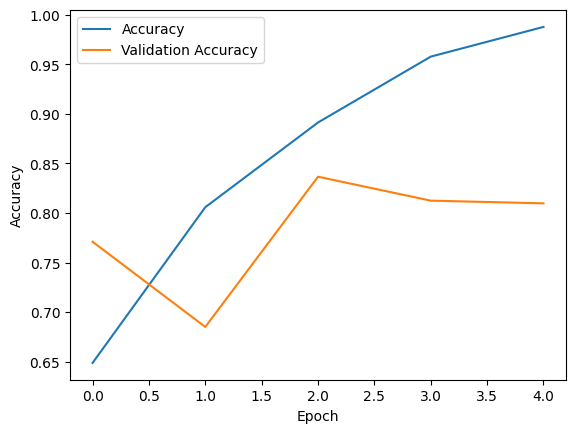

In [13]:
# RNN
from keras.layers import Bidirectional

model_rnn = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    SpatialDropout1D(0.2),  # Dropout layer for regularization
    Bidirectional(SimpleRNN(64)),  # Bidirectional
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_rnn = model_rnn.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss_rnn}, Test Accuracy: {accuracy_rnn}")

# Plot training history
plt.plot(history_rnn.history['accuracy'], label='Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# LSTM

model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    SpatialDropout1D(0.2),  # Dropout layer for regularization
    Bidirectional(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2)),  # Bidirectional LSTM layer
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 5
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/5
196/196 - 241s - 1s/step - accuracy: 0.7554 - loss: 0.5024 - val_accuracy: 0.8148 - val_loss: 0.4276
Epoch 2/5
196/196 - 260s - 1s/step - accuracy: 0.8612 - loss: 0.3397 - val_accuracy: 0.8562 - val_loss: 0.3620
Epoch 3/5
196/196 - 262s - 1s/step - accuracy: 0.8852 - loss: 0.2883 - val_accuracy: 0.8544 - val_loss: 0.3430
Epoch 4/5
196/196 - 262s - 1s/step - accuracy: 0.9053 - loss: 0.2417 - val_accuracy: 0.8597 - val_loss: 0.3464
Epoch 5/5
